### **Importing Libraries**


In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
import torch
import torch.nn as nn
from torchmetrics.classification import (
    BinaryRecall,
    BinaryAccuracy,
    BinaryF1Score,
    BinaryPrecision,
)

### **Loading the Dataset**


In [229]:
dataset = pd.read_csv("diabetes_data.csv")
dataset

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


### **Check for number of records and columns**


In [230]:
print(f"The dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns")

The dataset has 70692 rows and 18 columns


### **Check for null values**


In [231]:
dataset.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [232]:
dataset.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


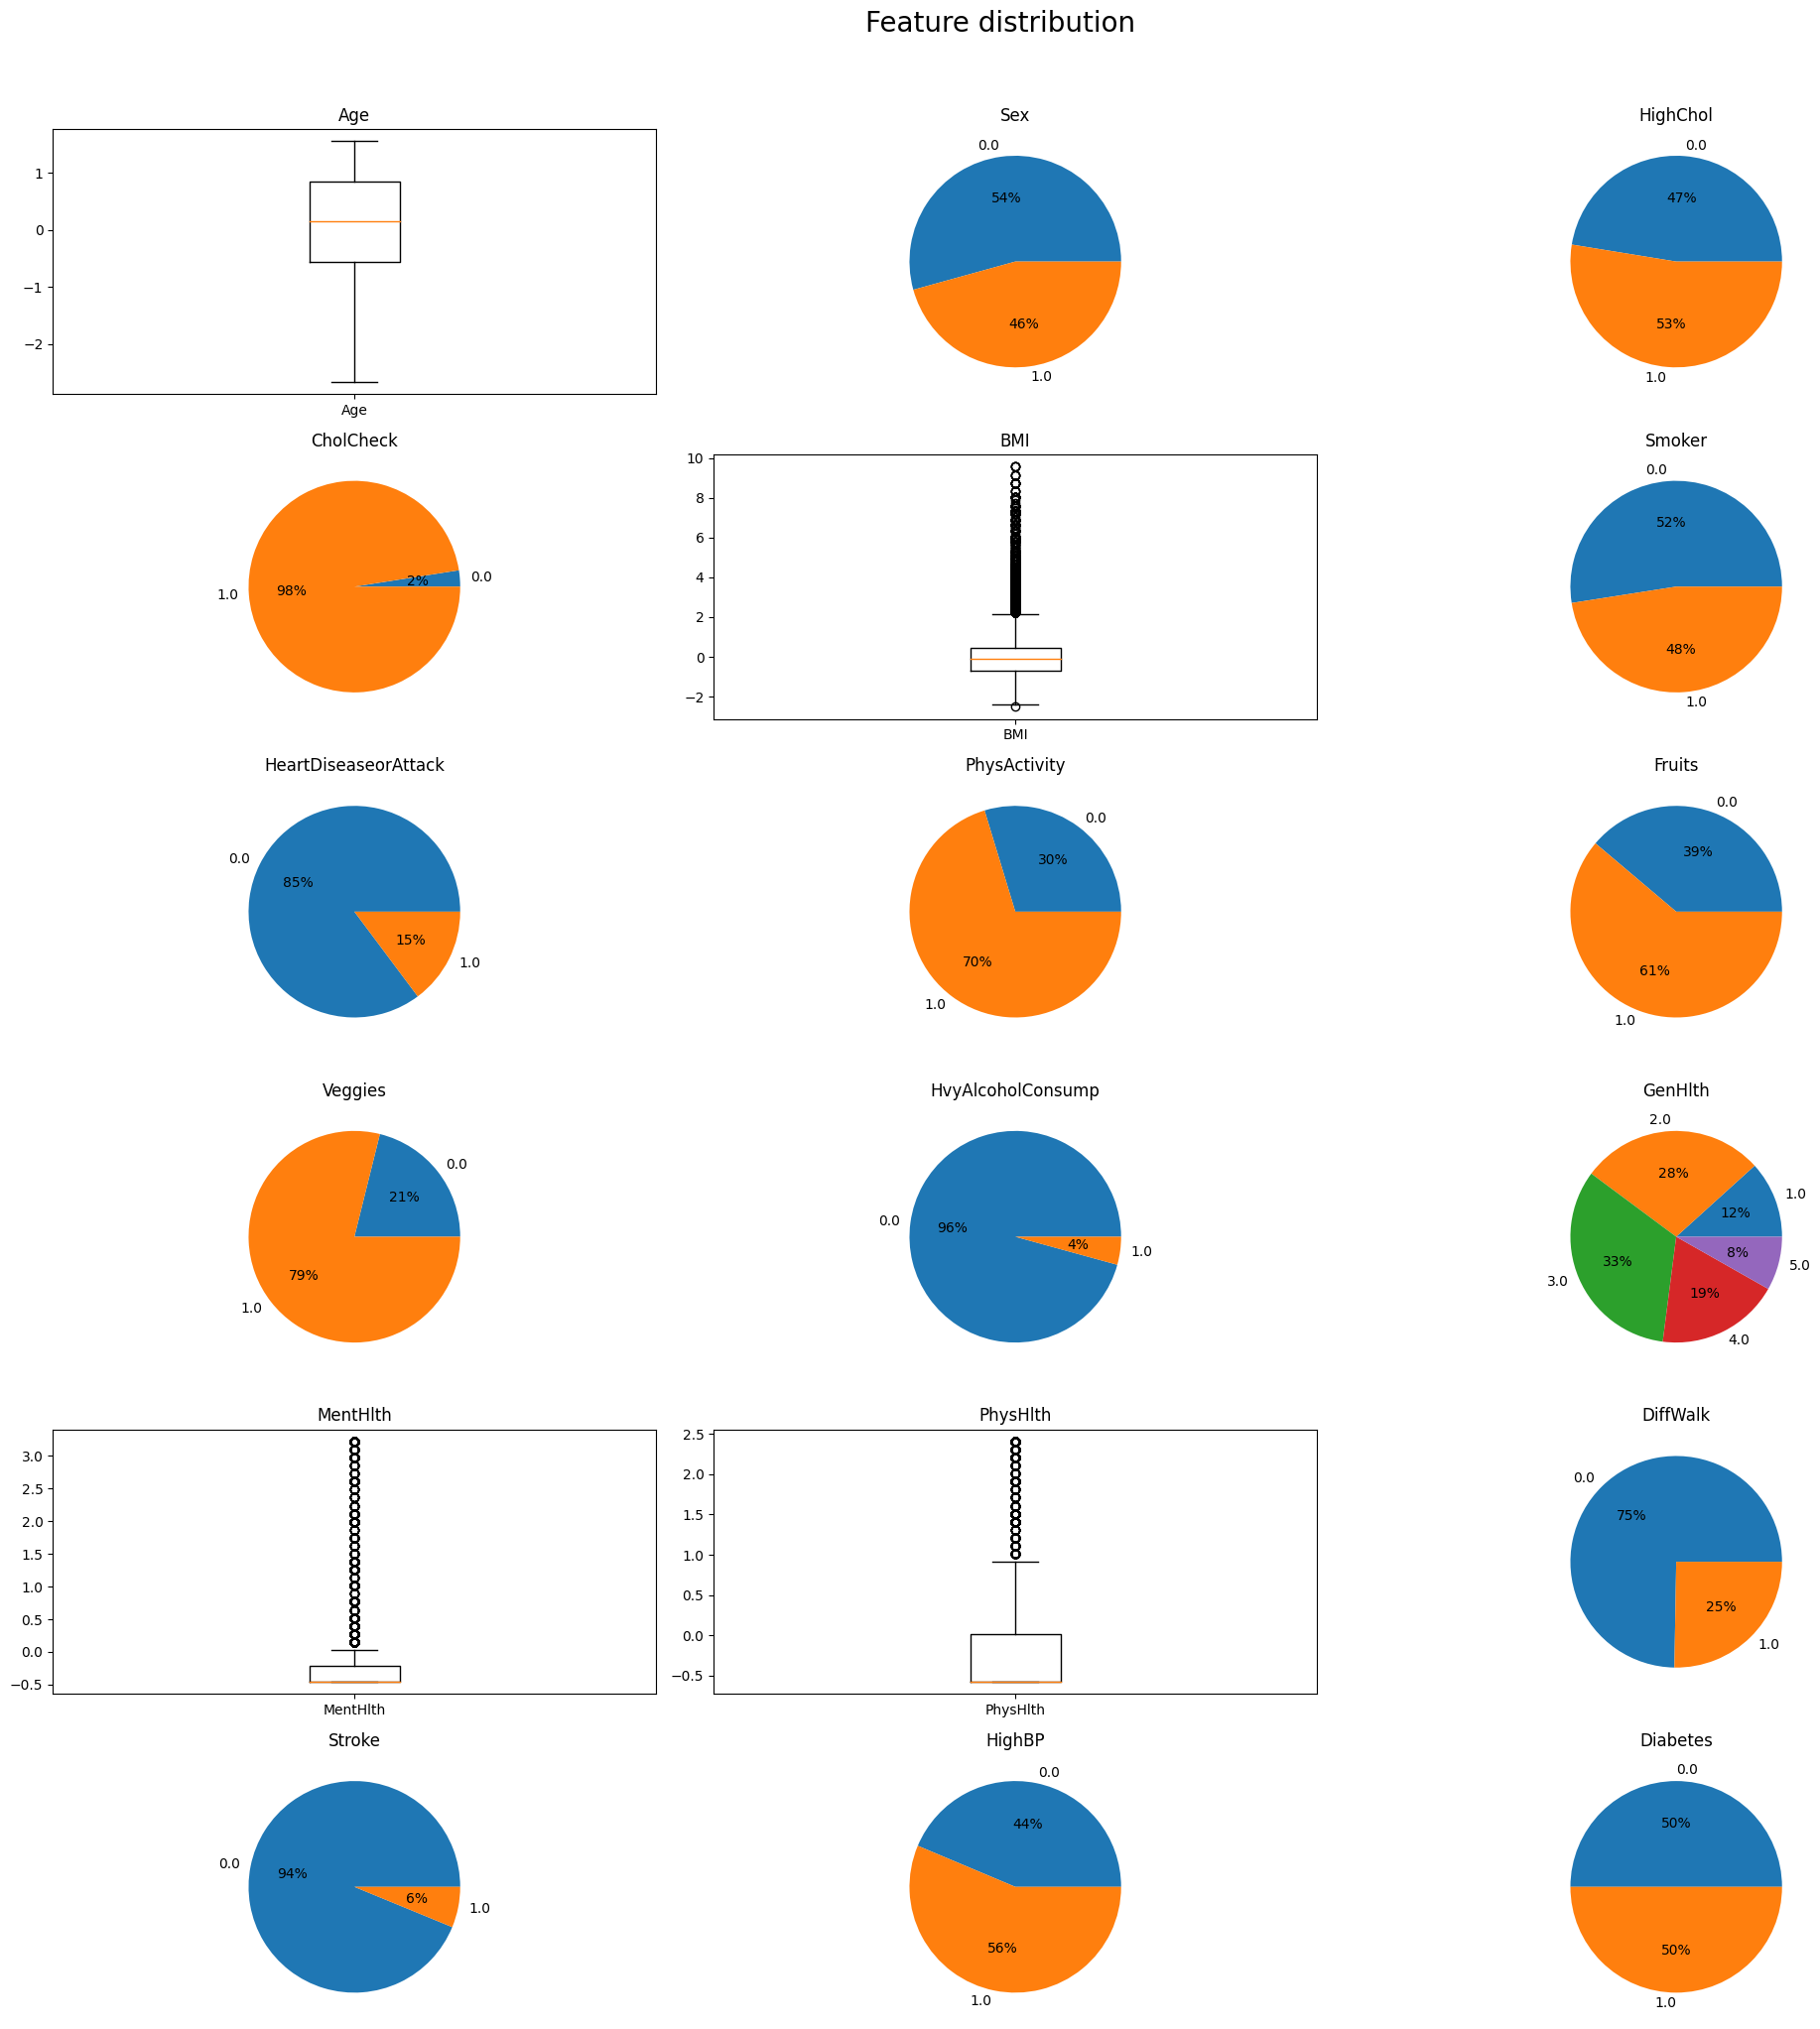

In [233]:
# make a figure which has 18 subplots (6 rows, 3 columns)
fig, axs = plt.subplots(6, 3, figsize=(20, 20))
# title of the figure with padding
fig.suptitle("Feature distribution", fontsize=20, y=1.02)


# if the column has less than 10 unique values, plot a pie chart and add it to the figure as a subplot
# otherwise a plot boxplot and add it to the figure as a subplot
for column, ax in zip(dataset.columns, axs.flatten()):
    if dataset[column].nunique() > 10:
        # z-score normalization
        dataset[column] = (dataset[column] - dataset[column].mean()) / (
            dataset[column].std()
        )
        ax.boxplot(dataset[column])
        ax.set_xticklabels([column])
    else:
        ax.pie(
            dataset[column].value_counts().sort_index(),
            labels=np.arange(dataset[column].min(), dataset[column].max() + 1),
            autopct="%1.0f%%",
        )
    ax.set_title(column)


plt.tight_layout()
plt.show()

In [234]:
dataset.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,7.069200e+04,70692.000000,70692.000000,70692.000000,7.069200e+04,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,7.069200e+04,7.069200e+04,70692.000000,70692.000000,70692.000000,70692.000000
mean,2.959087e-16,0.456997,0.525703,0.975259,-2.573119e-17,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,-6.432798e-18,-2.573119e-17,0.252730,0.062171,0.563458,0.500000
std,1.000000e+00,0.498151,0.499342,0.155336,1.000000e+00,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,1.000000e+00,1.000000e+00,0.434581,0.241468,0.495960,0.500004
min,-2.659063e+00,0.000000,0.000000,0.000000,-2.510135e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.600550e-01,-5.774465e-01,0.000000,0.000000,0.000000,0.000000
25%,-5.553891e-01,0.000000,0.000000,1.000000,-6.827406e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,-4.600550e-01,-5.774465e-01,0.000000,0.000000,0.000000,0.000000
50%,1.458355e-01,0.000000,1.000000,1.000000,-1.204654e-01,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,-4.600550e-01,-5.774465e-01,0.000000,0.000000,1.000000,0.500000
75%,8.470601e-01,1.000000,1.000000,1.000000,4.418098e-01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,-2.148256e-01,1.884099e-02,1.000000,0.000000,1.000000,1.000000
max,1.548285e+00,1.000000,1.000000,1.000000,9.578782e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,3.218387e+00,2.403991e+00,1.000000,1.000000,1.000000,1.000000


### **Process the dataset by separating the features (X) and the target variable (y).**


In [235]:
X, y = dataset.drop("Diabetes", axis=1).values, dataset[["Diabetes"]].values.reshape(
    -1,
)

print(f"The features matrix has {X.shape[0]} rows and {X.shape[1]} columns")
print(f"The target vector has {y.shape[0]} rows")

The features matrix has 70692 rows and 17 columns
The target vector has 70692 rows


### **Split the dataset into training, validation and test sets.**

- Training set: 80%
- Validation set: 10%
- Test set: 10%


In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test, X_validation, y_test, y_validation = train_test_split(
    X_test, y_test, test_size=0.5
)

### **1- Train KNN model with different values of K and find the accuracy for each K value.**


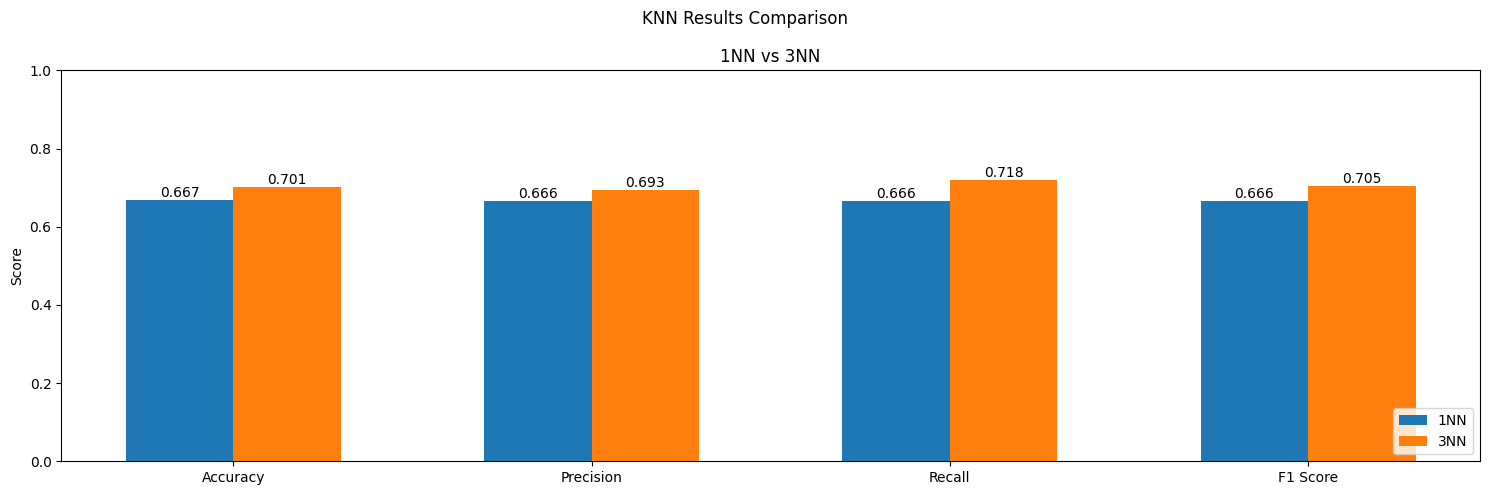

In [237]:
knn_1 = KNeighborsClassifier(n_neighbors=1, p=2)  # p=2 -> Euclidean distance
knn_1.fit(X_train, y_train)

knn_3 = KNeighborsClassifier(n_neighbors=3, p=2)  # p=2 -> Euclidean distance
knn_3.fit(X_train, y_train)


# Calculate metrics for 1NN
knn_1_accuracy = accuracy_score(y_validation, knn_1.predict(X_validation))
knn_1_precision = precision_score(y_validation, knn_1.predict(X_validation))
knn_1_recall = recall_score(y_validation, knn_1.predict(X_validation))
knn_1_f1 = f1_score(y_validation, knn_1.predict(X_validation))

# Calculate metrics for 3NN
knn_3_accuracy = accuracy_score(y_validation, knn_3.predict(X_validation))
knn_3_precision = precision_score(y_validation, knn_3.predict(X_validation))
knn_3_recall = recall_score(y_validation, knn_3.predict(X_validation))
knn_3_f1 = f1_score(y_validation, knn_3.predict(X_validation))

# Plotting
results_fig, results_ax = plt.subplots(1, 1, figsize=(15, 5))
results_fig.suptitle("KNN Results Comparison")
results_ax.bar(
    np.arange(4),
    [knn_1_accuracy, knn_1_precision, knn_1_recall, knn_1_f1],
    width=0.3,
    label="1NN",
)
results_ax.bar(
    np.arange(4) + 0.3,
    [knn_3_accuracy, knn_3_precision, knn_3_recall, knn_3_f1],
    width=0.3,
    label="3NN",
)
results_ax.set_xticks(np.arange(4) + 0.3 / 2)
results_ax.set_xticklabels(["Accuracy", "Precision", "Recall", "F1 Score"])
results_ax.set_ylabel("Score")
results_ax.set_ylim([0, 1])
results_ax.set_title("1NN vs 3NN")
results_ax.legend(loc="lower right")

results_ax.text(0, knn_1_accuracy, round(knn_1_accuracy, 3), ha="center", va="bottom")
results_ax.text(1, knn_1_precision, round(knn_1_precision, 3), ha="center", va="bottom")
results_ax.text(2, knn_1_recall, round(knn_1_recall, 3), ha="center", va="bottom")
results_ax.text(3, knn_1_f1, round(knn_1_f1, 3), ha="center", va="bottom")
results_ax.text(0.3, knn_3_accuracy, round(knn_3_accuracy, 3), ha="center", va="bottom")
results_ax.text(
    1.3, knn_3_precision, round(knn_3_precision, 3), ha="center", va="bottom"
)
results_ax.text(2.3, knn_3_recall, round(knn_3_recall, 3), ha="center", va="bottom")
results_ax.text(3.3, knn_3_f1, round(knn_3_f1, 3), ha="center", va="bottom")

plt.tight_layout()
plt.show()

### **2- Train XGBoost model with different values of hyperparameters and find the best hyperparameter values.**


#### **The hyperparameters to be tuned are:**


In [238]:
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.1, 0.01, 0.001],
}

#### **Model Training**


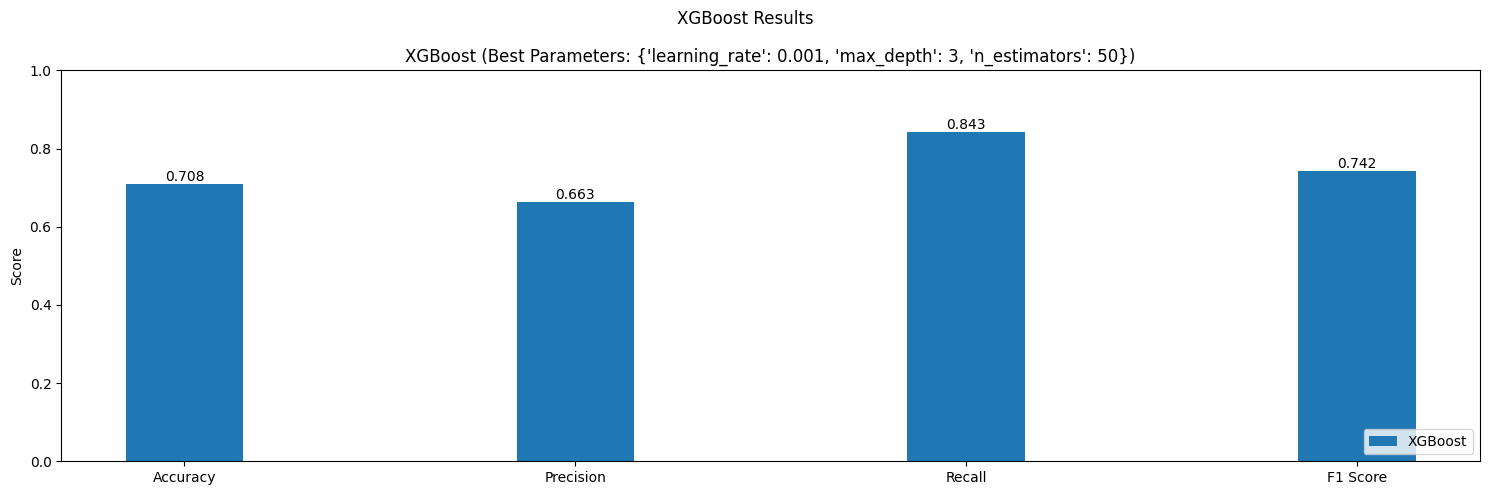

In [239]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=xgb_classifier, param_grid=param_grid, n_jobs=-1, scoring="recall"
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
xgb_accuracy = accuracy_score(y_validation, best_model.predict(X_validation))
xgb_precision = precision_score(y_validation, best_model.predict(X_validation))
xgb_recall = recall_score(y_validation, best_model.predict(X_validation))
xgb_f1 = f1_score(y_validation, best_model.predict(X_validation))

# Plotting
results_fig, results_ax = plt.subplots(1, 1, figsize=(15, 5))
results_fig.suptitle("XGBoost Results")
results_ax.bar(
    np.arange(4),
    [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1],
    width=0.3,
    label=f"XGBoost",
)
results_ax.set_xticks(np.arange(4))
results_ax.set_xticklabels(["Accuracy", "Precision", "Recall", "F1 Score"])
results_ax.set_ylabel("Score")
results_ax.set_ylim([0, 1])
results_ax.set_title(f"XGBoost (Best Parameters: {best_params})")
results_ax.legend(loc="lower right")

results_ax.text(0, xgb_accuracy, round(xgb_accuracy, 3), ha="center", va="bottom")
results_ax.text(1, xgb_precision, round(xgb_precision, 3), ha="center", va="bottom")
results_ax.text(2, xgb_recall, round(xgb_recall, 3), ha="center", va="bottom")
results_ax.text(3, xgb_f1, round(xgb_f1, 3), ha="center", va="bottom")

plt.tight_layout()
plt.show()

### **3- Train ANN models**


In [240]:
device = "cuda" if torch.cuda.is_available() else "cpu"  # Use GPU if available
print(f"Using {device} device")

Using cpu device


#### **Create three feed-forward neural network models**


In [241]:
class ANN_model_1(nn.Module):
    def __init__(self, in_shape, out_shape, hidden_units):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=in_shape, out_features=hidden_units),
            nn.LeakyReLU(0.1),
            nn.Linear(in_features=hidden_units, out_features=hidden_units * 2),
            nn.LeakyReLU(0.1),
            nn.Linear(in_features=hidden_units * 2, out_features=out_shape),
            nn.Sigmoid(),
        )

    def forward(self, X):
        return self.layer_stack(X)


class ANN_model_2(nn.Module):
    def __init__(self, in_shape, out_shape, hidden_units):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=in_shape, out_features=hidden_units),
            nn.LeakyReLU(0.1),
            nn.Linear(in_features=hidden_units, out_features=hidden_units * 4),
            nn.LeakyReLU(0.1),
            nn.Linear(in_features=hidden_units * 4, out_features=hidden_units * 4),
            nn.LeakyReLU(0.1),
            nn.Linear(in_features=hidden_units * 4, out_features=out_shape),
            nn.Sigmoid(),
        )

    def forward(self, X):
        return self.layer_stack(X)


class ANN_model_3(nn.Module):
    def __init__(self, in_shape, out_shape, hidden_units):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=in_shape, out_features=hidden_units),
            nn.LeakyReLU(0.1),
            nn.Linear(in_features=hidden_units, out_features=hidden_units * 4),
            nn.LeakyReLU(0.1),
            nn.Linear(in_features=hidden_units * 4, out_features=hidden_units * 8),
            nn.LeakyReLU(0.1),
            nn.Linear(in_features=hidden_units * 8, out_features=hidden_units * 8),
            nn.LeakyReLU(0.1),
            nn.Linear(in_features=hidden_units * 8, out_features=out_shape),
            nn.Sigmoid(),
        )

    def forward(self, X):
        return self.layer_stack(X)

#### **Initialize the ANN models**


In [242]:
model_1 = ANN_model_1(X_train.shape[1], 1, 30).to(device)
model_2 = ANN_model_2(X_train.shape[1], 1, 30).to(device)
model_3 = ANN_model_3(X_train.shape[1], 1, 30).to(device)

#### **Train the ANN models**


In [243]:
epochs = 200
accuracies: float = []
precisions: float = []
recalls: float = []
f1_scores: float = []


for model in [model_1, model_2, model_3]:
    torch.manual_seed(50)
    loss_function = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32).to(
        device
    )
    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train_tensor)
        loss = loss_function(y_pred, y_train_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    X_validation_tensor = torch.tensor(X_validation, dtype=torch.float32).to(device)
    y_validation_tensor = torch.tensor(
        y_validation.reshape(-1, 1), dtype=torch.float32
    ).to(device)

    with torch.inference_mode():
        model.eval()
        y_pred = model(X_validation_tensor)
        accuracy = BinaryAccuracy().to(device)
        precision = BinaryPrecision().to(device)
        recall = BinaryRecall().to(device)
        f1 = BinaryF1Score().to(device)
        accuracies.append(accuracy(y_pred, y_validation_tensor).item())
        precisions.append(precision(y_pred, y_validation_tensor).item())
        recalls.append(recall(y_pred, y_validation_tensor).item())
        f1_scores.append(f1(y_pred, y_validation_tensor).item())

#### **Plot the training and validation accuracy of the ANN models**


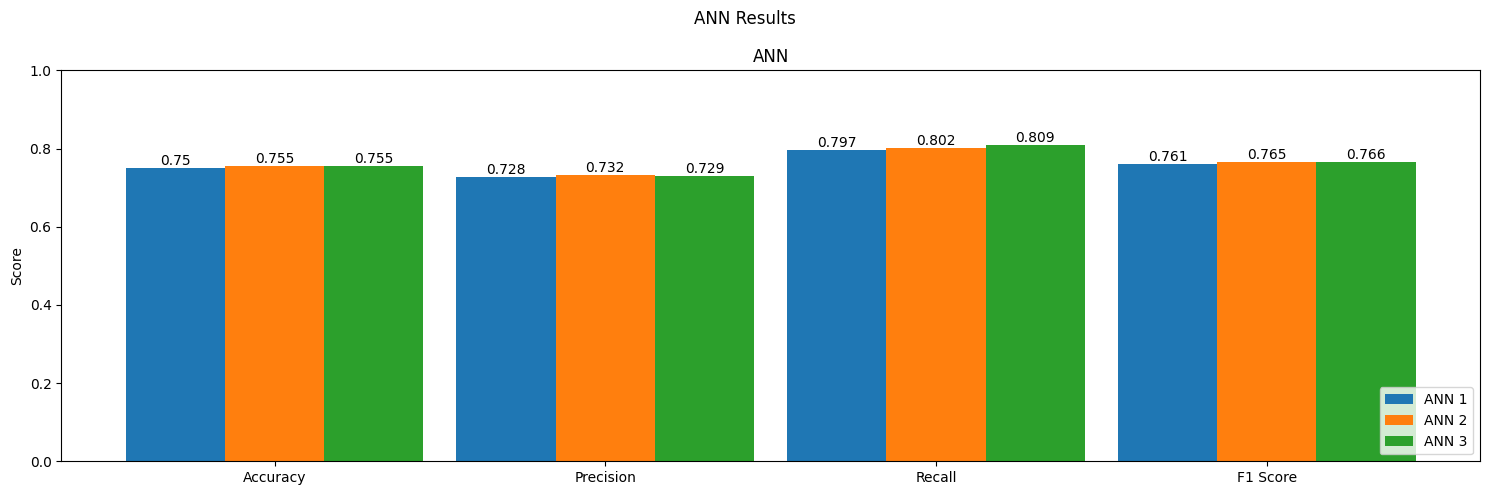

In [244]:
# Plotting
results_fig, results_ax = plt.subplots(1, 1, figsize=(15, 5))
results_fig.suptitle("ANN Results")
results_ax.bar(
    np.arange(4),
    [accuracies[0], precisions[0], recalls[0], f1_scores[0]],
    width=0.3,
    label=f"ANN 1",
)
results_ax.bar(
    np.arange(4) + 0.3,
    [accuracies[1], precisions[1], recalls[1], f1_scores[1]],
    width=0.3,
    label=f"ANN 2",
)
results_ax.bar(
    np.arange(4) + 0.6,
    [accuracies[2], precisions[2], recalls[2], f1_scores[2]],
    width=0.3,
    label=f"ANN 3",
)
results_ax.set_xticks(np.arange(4) + 0.3)
results_ax.set_xticklabels(["Accuracy", "Precision", "Recall", "F1 Score"])
results_ax.set_ylabel("Score")
results_ax.set_ylim([0, 1])
results_ax.set_title(f"ANN")
results_ax.legend(loc="lower right")

results_ax.text(0, accuracies[0], round(accuracies[0], 3), ha="center", va="bottom")
results_ax.text(1, precisions[0], round(precisions[0], 3), ha="center", va="bottom")
results_ax.text(2, recalls[0], round(recalls[0], 3), ha="center", va="bottom")
results_ax.text(3, f1_scores[0], round(f1_scores[0], 3), ha="center", va="bottom")
results_ax.text(0.3, accuracies[1], round(accuracies[1], 3), ha="center", va="bottom")
results_ax.text(1.3, precisions[1], round(precisions[1], 3), ha="center", va="bottom")
results_ax.text(2.3, recalls[1], round(recalls[1], 3), ha="center", va="bottom")
results_ax.text(3.3, f1_scores[1], round(f1_scores[1], 3), ha="center", va="bottom")
results_ax.text(0.6, accuracies[2], round(accuracies[2], 3), ha="center", va="bottom")
results_ax.text(1.6, precisions[2], round(precisions[2], 3), ha="center", va="bottom")
results_ax.text(2.6, recalls[2], round(recalls[2], 3), ha="center", va="bottom")
results_ax.text(3.6, f1_scores[2], round(f1_scores[2], 3), ha="center", va="bottom")


plt.tight_layout()
plt.show()

### **from the above we can see that the ANN3 model has the best evaluation metrics results. So we will use it to predict the test set.**


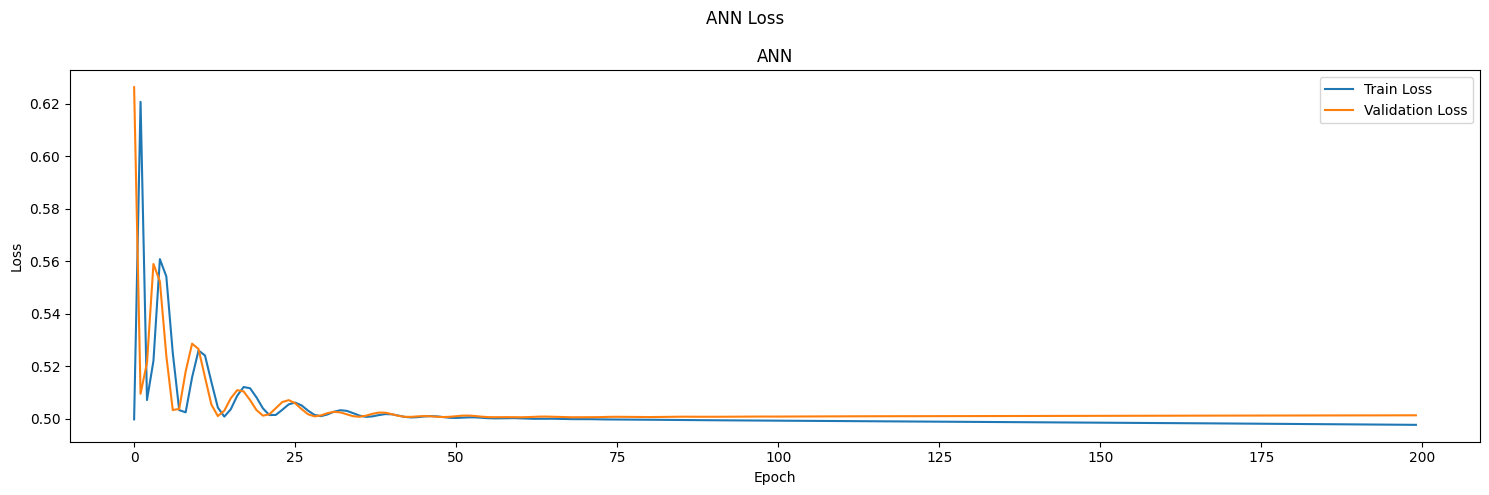

In [247]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32).to(device)
X_validation_tensor = torch.tensor(X_validation, dtype=torch.float32).to(device)
y_validation_tensor = torch.tensor(y_validation.reshape(-1, 1), dtype=torch.float32).to(
    device
)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32).to(device)
train_loss = []
validation_loss = []
epochs = 200
torch.manual_seed(50)
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)
for epoch in range(epochs):
    model_3.train()
    y_pred = model_3(X_train_tensor)
    loss = loss_function(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
    with torch.inference_mode():
        model_3.eval()
        y_pred = model_3(X_validation_tensor)
        loss = loss_function(y_pred, y_validation_tensor)
        validation_loss.append(loss.item())

# Plotting
results_fig, results_ax = plt.subplots(1, 1, figsize=(15, 5))
results_fig.suptitle("ANN Loss")
results_ax.plot(np.arange(epochs), train_loss, label="Train Loss")
results_ax.plot(np.arange(epochs), validation_loss, label="Validation Loss")
results_ax.set_ylabel("Loss")
results_ax.set_xlabel("Epoch")
results_ax.set_title(f"ANN")
results_ax.legend(loc="upper right")
plt.tight_layout()

plt.show()

In [248]:
with torch.inference_mode():
    model_3.eval()
    y_pred = model_3(X_test_tensor)
    accuracy = BinaryAccuracy().to(device)
    precision = BinaryPrecision().to(device)
    recall = BinaryRecall().to(device)
    f1 = BinaryF1Score().to(device)
    print(f"Accuracy: {accuracy(y_pred, y_test_tensor).item()}")
    print(f"Precision: {precision(y_pred, y_test_tensor).item()}")
    print(f"Recall: {recall(y_pred, y_test_tensor).item()}")
    print(f"F1 Score: {f1(y_pred, y_test_tensor).item()}")

Accuracy: 0.7595133781433105
Precision: 0.7380585670471191
Recall: 0.8086662888526917
F1 Score: 0.771750807762146


### **From the above we can see that ANN3 model does not overfit and learns well.**


In [249]:
# get the features of the examples that were classified incorrectly

with torch.inference_mode():
    model.eval()
    y_pred = model(X_test_tensor)
    y_pred = y_pred.detach().cpu().numpy()
    y_pred = np.where(y_pred > 0.5, 1, 0)
    y_pred = y_pred.reshape(-1)
    y_test = y_test.reshape(-1)
    incorrect_examples = X_test[y_pred != y_test]
    print(f"The model misclassified {len(incorrect_examples)} examples")
    print(
        f"The model misclassified {len(incorrect_examples) / len(X_test) * 100}% of the examples"
    )

The model misclassified 1700 examples
The model misclassified 24.048663177252795% of the examples


In [250]:
incorrect_examples = pd.DataFrame(incorrect_examples, columns=dataset.columns[:-1])
incorrect_examples

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
0,0.496448,0.0,0.0,1.0,-0.120465,1.0,0.0,1.0,1.0,1.0,0.0,3.0,-0.460055,-0.279303,1.0,0.0,1.0
1,-2.308451,0.0,0.0,1.0,-0.401603,1.0,0.0,1.0,0.0,1.0,1.0,4.0,1.992240,-0.080540,0.0,0.0,0.0
2,-0.555389,1.0,1.0,1.0,1.004085,0.0,0.0,1.0,1.0,1.0,0.0,2.0,-0.460055,-0.577446,0.0,0.0,1.0
3,0.145836,1.0,1.0,1.0,0.020103,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.379166,-0.577446,0.0,0.0,1.0
4,0.847060,1.0,1.0,1.0,-0.963878,1.0,0.0,1.0,1.0,0.0,0.0,2.0,-0.460055,2.403991,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,-1.256614,0.0,0.0,1.0,0.301241,0.0,0.0,0.0,1.0,1.0,0.0,4.0,2.973158,2.403991,1.0,0.0,0.0
1696,-1.957838,0.0,1.0,1.0,-0.401603,0.0,0.0,1.0,1.0,1.0,0.0,3.0,-0.460055,-0.080540,0.0,0.0,0.0
1697,0.847060,0.0,0.0,1.0,-0.823309,0.0,0.0,1.0,0.0,0.0,0.0,2.0,-0.460055,-0.577446,0.0,0.0,1.0
1698,-1.957838,1.0,0.0,1.0,-0.682741,0.0,0.0,1.0,1.0,1.0,1.0,3.0,-0.460055,-0.577446,0.0,0.0,0.0


In [ ]:
incorrect_examples["CholCheck"].value_counts()
incorrect_examples["HeartDiseaseorAttack"].value_counts()
incorrect_examples["PhysActivity"].value_counts()
incorrect_examples["Veggies"].value_counts()
incorrect_examples["HvyAlcoholConsump"].value_counts()
incorrect_examples["DiffWalk"].value_counts()
incorrect_examples["Stroke"].value_counts()

impact = [
    "CholCheck",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Veggies",
    "HvyAlcoholConsump",
    "DiffWalk",
    "Stroke",
]

CholCheck
1.0    1699
0.0      26
Name: count, dtype: int64

In [ ]:
# check if the percentage of the examples that were misclassified is the same for each feature in dataset

for feature in impact:
    print(
        f"The percentage of the examples that were misclassified when {feature} {incorrect_examples[feature].value_counts().index[0]} is {incorrect_examples[feature].value_counts()[0] /incorrect_examples[feature].value_counts()[1] }% and The percentage of the examples in the dataset when {feature} {incorrect_examples[feature].value_counts().index[0]} is {dataset[feature].value_counts()[0] /dataset[feature].value_counts()[1] }%"
    )

The percentage of the examples that were misclassified when CholCheck 1.0 is 0.015303119482048263% and The percentage of the examples in the dataset when CholCheck 1.0 is 0.025368782907619337%
The percentage of the examples that were misclassified when HeartDiseaseorAttack 0.0 is 6.532751091703057% and The percentage of the examples in the dataset when HeartDiseaseorAttack 0.0 is 5.765432098765432%
The percentage of the examples that were misclassified when PhysActivity 1.0 is 0.44472361809045224% and The percentage of the examples in the dataset when PhysActivity 1.0 is 0.4224028652487978%
The percentage of the examples that were misclassified when Veggies 1.0 is 0.2844378257632167% and The percentage of the examples in the dataset when Veggies 1.0 is 0.2677905308464849%
The percentage of the examples that were misclassified when HvyAlcoholConsump 0.0 is 22.63013698630137% and The percentage of the examples in the dataset when HvyAlcoholConsump 0.0 is 22.40794701986755%
The percentage

In [ ]:
incorrect_examples[impact].value_counts()

CholCheck  HeartDiseaseorAttack  PhysActivity  Veggies  HvyAlcoholConsump  DiffWalk  Stroke
1.0        0.0                   1.0           1.0      0.0                0.0       0.0       668
                                 0.0           1.0      0.0                0.0       0.0       179
                                 1.0           0.0      0.0                0.0       0.0       159
                                               1.0      0.0                1.0       0.0       103
                                 0.0           1.0      0.0                1.0       0.0        99
                                               0.0      0.0                0.0       0.0        84
           1.0                   1.0           1.0      0.0                0.0       0.0        77
           0.0                   1.0           1.0      1.0                0.0       0.0        32
                                 0.0           0.0      0.0                1.0       0.0        31
                 

In [ ]:
# drop CholCheck from the dataset
# dataset.drop("Sex", axis=1, inplace=True)
# dataset.drop("CholCheck", axis=1, inplace=True)
# dataset.drop("HeartDiseaseorAttack", axis=1, inplace=True)
# dataset.drop("PhysActivity", axis=1, inplace=True)
# dataset.drop("Veggies", axis=1, inplace=True)
# dataset.drop("HvyAlcoholConsump", axis=1, inplace=True)
# dataset.drop("DiffWalk", axis=1, inplace=True)
# dataset.drop("Stroke", axis=1, inplace=True)
# split the dataset into train, validation and test sets
X, y = dataset.drop("Diabetes", axis=1).values, dataset[["Diabetes"]].values.reshape(
    -1,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test, X_validation, y_test, y_validation = train_test_split(
    X_test, y_test, test_size=0.5
)


# train the model on the new dataset
model = ANN_model_3(X_train.shape[1], 1, 30).to(device)
epochs = 200
torch.manual_seed(50)
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32).to(device)
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = loss_function(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Test on the validation set
X_validation_tensor = torch.tensor(X_validation, dtype=torch.float32).to(device)
y_validation_tensor = torch.tensor(y_validation.reshape(-1, 1), dtype=torch.float32).to(
    device
)

with torch.inference_mode():
    model.eval()
    y_pred = model(X_validation_tensor)
    accuracy = BinaryAccuracy().to(device)
    precision = BinaryPrecision().to(device)
    recall = BinaryRecall().to(device)
    f1 = BinaryF1Score().to(device)
    print(
        f"Validation set results:\nAccuracy: {accuracy(y_pred, y_validation_tensor).item()}\nPrecision: {precision(y_pred, y_validation_tensor).item()}\nRecall: {recall(y_pred, y_validation_tensor).item()}\nF1 Score: {f1(y_pred, y_validation_tensor).item()}\n"
    )

# Test on the test set and plot the results
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32).to(device)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32).to(device)

with torch.inference_mode():
    model.eval()
    y_pred = model(X_train_tensor)

    accuracy = BinaryAccuracy().to(device)
    precision = BinaryPrecision().to(device)
    recall = BinaryRecall().to(device)
    f1 = BinaryF1Score().to(device)
    print(
        f"Train set results:\nAccuracy: {accuracy(y_pred, y_train_tensor).item()}\nPrecision: {precision(y_pred, y_train_tensor).item()}\nRecall: {recall(y_pred, y_train_tensor).item()}\nF1 Score: {f1(y_pred, y_train_tensor).item()}\n"
    )
    y_pred = model(X_test_tensor)
    print(
        f"Test set results:\nAccuracy: {accuracy(y_pred, y_test_tensor).item()}\nPrecision: {precision(y_pred, y_test_tensor).item()}\nRecall: {recall(y_pred, y_test_tensor).item()}\nF1 Score: {f1(y_pred, y_test_tensor).item()}"
    )

Validation set results:
Accuracy: 0.7513437271118164
Precision: 0.7363327145576477
Recall: 0.7896212935447693
F1 Score: 0.7620465755462646

Train set results:
Accuracy: 0.7535409331321716
Precision: 0.7354214191436768
Recall: 0.7896342277526855
F1 Score: 0.7615642547607422

Test set results:
Accuracy: 0.7521573305130005
Precision: 0.7422327399253845
Recall: 0.7847995758056641
F1 Score: 0.7629228830337524


In [ ]:
# get the features of the examples that were classified incorrectly

with torch.inference_mode():
    model.eval()
    y_pred = model(X_test_tensor)
    y_pred = y_pred.detach().cpu().numpy()
    y_pred = np.where(y_pred > 0.5, 1, 0)
    y_pred = y_pred.reshape(-1)
    y_test = y_test.reshape(-1)
    incorrect_examples = X_test[y_pred != y_test]
    print(f"The model misclassified {len(incorrect_examples)} examples")
    print(
        f"The model misclassified {len(incorrect_examples) / len(X_test) * 100}% of the examples"
    )

incorrect_examples = pd.DataFrame(incorrect_examples, columns=dataset.columns[:-1])
incorrect_examples

The model misclassified 1752 examples
The model misclassified 24.784269345027585% of the examples


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,HighBP
0,-0.555389,1.0,0.0,1.0,-0.682741,0.0,0.0,1.0,0.0,1.0,0.0,3.0,-0.460055,-0.279303,0.0
1,-0.906001,1.0,0.0,1.0,0.582379,0.0,0.0,1.0,1.0,1.0,0.0,3.0,-0.460055,-0.577446,0.0
2,0.847060,0.0,1.0,1.0,-0.401603,1.0,0.0,0.0,1.0,1.0,0.0,3.0,-0.460055,-0.080540,0.0
3,-0.555389,0.0,0.0,1.0,-0.401603,0.0,0.0,1.0,1.0,0.0,0.0,3.0,-0.214826,0.913272,1.0
4,0.496448,1.0,1.0,1.0,-0.542172,1.0,1.0,0.0,0.0,1.0,0.0,5.0,-0.460055,2.403991,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,1.548285,0.0,0.0,1.0,-0.401603,0.0,0.0,1.0,1.0,1.0,0.0,2.0,-0.460055,0.813891,0.0
1748,-0.204777,1.0,0.0,1.0,-0.542172,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.398248,2.403991,1.0
1749,-0.555389,1.0,0.0,1.0,-0.401603,1.0,0.0,1.0,0.0,1.0,0.0,2.0,-0.460055,0.416366,0.0
1750,0.847060,0.0,1.0,1.0,0.441810,1.0,0.0,1.0,1.0,1.0,0.0,1.0,-0.460055,-0.279303,1.0


### **We tried to find any correlation between the features and the target variable. and experimented by removing one feature or more. and the results did not improve that much.**
